In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.model_selection as sk
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle


import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [5]:
#READ DATA FROM CSV + PADDING/TRUNCATING TO 15

import numpy as np

def read_csv(filename):
    file = open(filename)

    lines = file.readline() # Consumes CSV header
    lines = file.readline()
    lines_list = lines.split(",")
    batch = lines_list[0]
    
    raw_inputs = [[], [], []] # For acceleromter readings xyz wrist and xyz arm

    label_list = []
    label = 0
    
    total_inputs = []

    try:
        while lines:
            lines_list = lines.split(",")
            
            if batch != lines_list[0]:
                previous_batch = batch
                batch = lines_list[0]
                
                total_inputs.append(raw_inputs)
                label_list.append(int(label))
                label = 0


                raw_inputs = [[], [], []] 
                raw_inputs[0].append(np.int8(lines_list[5]))
                raw_inputs[1].append(np.int8(lines_list[6]))
                raw_inputs[2].append(np.int8(lines_list[7]))
#                 print(np.int8(lines_list[7]), lines_list[7])

                
            else:
                label = lines_list[21]
                raw_inputs[0].append(np.int8(lines_list[5]))
                raw_inputs[1].append(np.int8(lines_list[6]))
                raw_inputs[2].append(np.int8(lines_list[7]))

              
                
            lines = file.readline()
    except IndexError:
        print(batch)
        
    return total_inputs, label_list




In [6]:
a, lable_list = read_csv('updated.csv')




In [7]:
combined_samples = []
container = []
for i in range(len(a)):
    for j in range(len(a[0])):
        container.extend(a[i][j])
    combined_samples.append(container)
    container = []


In [10]:
combined_samples = np.array(combined_samples)
lable_list = np.array(lable_list)

combined_samples, lable_list = shuffle(combined_samples, lable_list)

# scaler = MinMaxScaler(feature_range=(0,1))
# combined_samples_one_column = combined_samples.reshape([-1,1])




# result_one_column = scaler.fit_transform(combined_samples_one_column)
# scaled_samples = result_one_column.reshape(combined_samples.shape)


scaled_samples = combined_samples

print(scaled_samples.shape)



(1330, 300)


In [12]:
print(type(combined_samples[0][0]))

<class 'numpy.int8'>


In [11]:
X_train, X_test, y_train, y_test = sk.train_test_split(combined_samples, lable_list, test_size=0.33)


In [9]:
inputs = keras.Input(shape=(300,), dtype=tf.int8)
layer_1 = layers.Dense(64, activation="relu")
layer_1_output = layer_1(inputs) 

layer_2 = layers.Dense(64, activation="relu")
layer_2_output = layer_2(layer_1_output) 

outputs = layers.Dense(5, activation="softmax")(layer_2_output)

In [10]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)



Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                19264     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 23,749
Trainable params: 23,749
Non-trainable params: 0
_________________________________________________________________


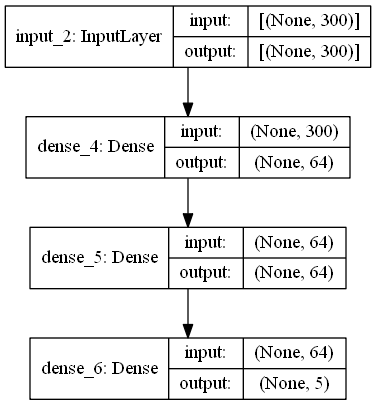

In [4]:
# from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='Model1.png', show_shapes=True)
# from IPython.display import Image
# Image(retina=True, filename='Model1.png')


In [9]:
import keras.backend as K

def size(model): # Compute number of params in a model (the actual number of floats)
    return sum([np.prod(K.get_value(w).shape) for w in model.trainable_weights])

print(size(model))


23749


In [14]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=5, shuffle=True, verbose=2)

Epoch 1/5
81/81 - 0s - loss: 4.7009e-07 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.9889
Epoch 2/5
81/81 - 0s - loss: 4.3572e-07 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.9889
Epoch 3/5
81/81 - 0s - loss: 4.0790e-07 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.9889
Epoch 4/5
81/81 - 0s - loss: 3.8468e-07 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.9889
Epoch 5/5
81/81 - 0s - loss: 3.5165e-07 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.9889


In [ ]:
X_test = scaled_samples
y_test = lable_list
print(type(X_test[0][0]))

In [8]:


test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

14/14 - 1s - loss: 0.1154 - accuracy: 0.9909
Test loss: 0.11537133902311325
Test accuracy: 0.9908883571624756


In [21]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_true=lable_list, y_pred=output_label)
print(cm)

[[274   0   4   2   0]
 [  0 362   0   0   0]
 [  0   0 243   1   0]
 [  1   0   0 320   0]
 [  0   0   0   0 123]]


In [20]:
output_label = []

for i in range(len(scaled_samples)):
    q = model.predict(np.array([scaled_samples[i]]))
    output_label.append(int(np.argmax(q)))


[[274   0   4   2   0]
 [  0 362   0   0   0]
 [  0   0 243   1   0]
 [  1   0   0 320   0]
 [  0   0   0   0 123]]


In [7]:
# q = model.predict(test_data[0][None,...])

# model.save('two_layers.h5')
from keras.models import load_model

model = load_model('two_layers.h5')

In [13]:
model.summary()

for layer in model.layers:
  print(layer.get_config())

# for layer in model.layers:
#   print(layer.get_weights()) 818 762 202 10


Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                19264     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 325       
Total params: 23,749
Trainable params: 23,749
Non-trainable params: 0
_________________________________________________________________
{'batch_input_shape': (None, 300), 'dtype': 'int8', 'sparse': False, 'ragged': False, 'name': 'input_2'}
{'name': 'dense_4', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_na

In [58]:
sample_num = 10

test_sam = scaled_samples[sample_num]    #  75 76 80 78 10 
test_label = lable_list[sample_num]

q = model.predict(np.array([test_sam]))
print(q)

print(list[test_sam])

print(test_label)


[[0. 0. 0. 0. 1.]]
list[array([ -38,  -50,  -58,  -82, -104, -121, -128, -128, -128, -128, -128,
       -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
       -128, -128,  -88,  -62,  -46,  -49,  -58,  -61,  -65,  -64,  -60,
        -63,  -68,  -75,  -78,  -82,  -86,  -90,  -93,  -96,  -96,  -93,
        -89,  -86,  -84,  -81,  -76,  -73,  -70,  -64,  -58,  -56,  -51,
        -48,  -47,  -43,  -39,  -36,  -36,  -36,  -38,  -35,  -30,  -28,
        -28,  -26,  -24,  -23,  -23,  -23,  -21,  -19,  -19,  -19,  -20,
        -22,  -25,  -30,  -34,  -37,  -38,  -43,  -47,  -54,  -59,  -72,
        -88,  -88,  -88,  -87,  -95, -105, -121, -128, -128, -128, -128,
       -128,  -56, -117, -128, -128, -128, -128, -128, -128, -128, -117,
        -86,  -52,  -16,   13,   28,   58,   89,  108,  127,  127,  127,
        127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
        117,  111,  116,  124,  125,  122,  119,  113,  111,  109,  106,
         99,   93,   88,   

In [61]:
sample_num = 84


for i in range(len(scaled_samples)):
    test_sam = scaled_samples[i]    #  75 76 80 78   47     818 762 202 10
    test_label = lable_list[i]

    q = model.predict(np.array([test_sam]))
#     print(int(np.argmax(q)), i)
      
    if q[0][int(np.argmax(q))] < 1:
        print(i)
#     if int(np.argmax(q)) != test_label:
#         print(f"WRONG {i}")


        
        
# WRONG 202
# WRONG 762
# WRONG 818
# WRONG 823
# WRONG 1149
# WRONG 1157
# WRONG 1188
# WRONG 1192


# 2
# 76
# 81
# 145
# 202    1
# 347
# 558
# 748
# 762    1
# 823    1
# 855
# 953
# 1004
# 1015
# 1149    1
# 1157     1
# 1188     1
# 1190
# 1277
# 1318

2
76
81
145
202
347
558
748
762
823
855
953
1004
1015
1149
1157
1188
1190
1277
1318


In [94]:
max_int = 0
min_int = 0

test_sam = scaled_samples[1278]
test_label = lable_list[1278]
weights_1 = model.layers[1].get_weights()[0]
biases_1 = model.layers[1].get_weights()[1]


weights_2 = model.layers[2].get_weights()[0]
biases_2  = model.layers[2].get_weights()[1]

weights_3 = model.layers[3].get_weights()[0]
biases_3  = model.layers[3].get_weights()[1]

results = []
results_2 = []
results_3 = []

number_nodes = 64
number_inputs = 300
output_nodes = 5
#     print(len(weights_1))
#     print(len(weights_1[0]))

sum = 0

for i in range(number_nodes):
    for j in range(number_inputs):
        sum += test_sam[j] * weights_1[j][i]
    sum += biases_1[i]
    results.append(max(0, sum))
    sum = 0

sum = 0

for i in range(number_nodes):
    for j in range(len(results)):
        sum += results[j] * weights_2[j][i]
    sum += biases_2[i]
    results_2.append(max(0, sum))
    sum = 0

sum = 0

for i in range(output_nodes):
    for j in range(len(results)):
        sum += results_2[j] * weights_3[j][i]
    sum += biases_3[i]
    results_3.append(sum)
    sum = 0
# if max(results) > max_int:
#     max_int = max(results)
# if max(results_2) > max_int:
#     max_int = max(results_2)
# if max(results_3) > max_int:
#     max_int = max(results_3)

# if min(results) < min_int:
#     min_int = min(results)
# if min(results_2) < min_int:
#     min_int = min(results_2)
# if min(results_3) < min_int:
#     min_int = min(results_3)


        
print(results_3)

[-6.676661611811975, 190.77872379444665, -88.94199811314171, -90.74696566204754, -88.82365704588324]


In [85]:
# print("learned weights =", weights)

# # Biases are similar because they are all initialized with zeros (by default).
# print("learned biases =", biases)
from numpy  import exp
from numpy  import sum

def softmax(vector):
    e = exp(vector)
    return e / e.sum()


print("results3 =", results_3)



after_activation = softmax(results_3)
print(after_activation)
print(sum(after_activation))
print(sum(q))


results3 = [-6.676661611811975, 190.77872379444665, -88.94199811314171, -90.74696566204754, -88.82365704588324]
[1.76285136e-086 1.00000000e+000 3.30243289e-122 5.43183482e-123
 3.71731080e-122]
1.0
1.0
